In [1]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.4 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints
!mkdir inputs
!mkdir outputs
%cd "/content/Self-Correction-Human-Parsing/inputs"
!mkdir data
%cd ..

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (719/719), done.
remote: Compressing objects: 100% (568/568), done.
remote: Total 719 (delta 149), reused 610 (delta 140), pack-reused 0
Receiving objects: 100% (719/719), 3.88 MiB | 9.98 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/Self-Correction-Human-Parsing
/content/Self-Correction-Human-Parsing/inputs
/content/Self-Correction-Human-Parsing


In [3]:
dataset = 'lip'         #select from ['lip', 'atr', 'pascal']

In [4]:
import gdown

if dataset == 'lip':
    url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
elif dataset == 'atr':
    url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
elif dataset == 'pascal':
    url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
100%|██████████| 267M/267M [00:06<00:00, 44.4MB/s]


'checkpoints/final.pth'

In [5]:
!python3 simple_extractor.py --dataset 'lip' --model-restore 'checkpoints/final.pth' --input-dir 'inputs/data' --output-dir 'outputs' --logits

Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']
100% 1/1 [00:01<00:00,  1.19s/it]


In [6]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2, random

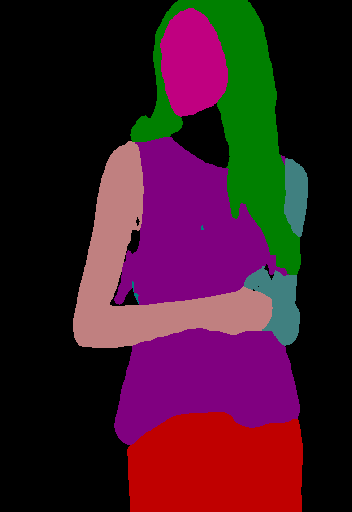

In [7]:
parsing_image = cv2.imread("/content/Self-Correction-Human-Parsing/outputs/image.png")
cv2_imshow(parsing_image)

In [8]:
dataset = np.load('/content/Self-Correction-Human-Parsing/outputs/image.npy', encoding='bytes')
dataset.shape

(512, 352, 20)

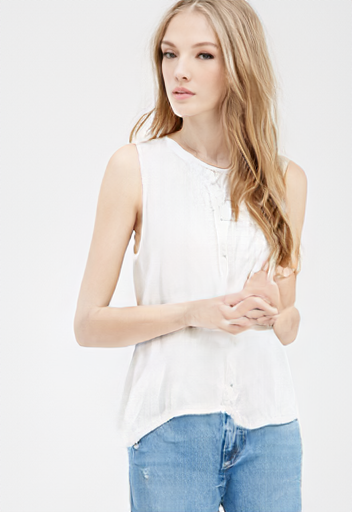

In [9]:
input_image = cv2.imread("/content/Self-Correction-Human-Parsing/inputs/data/image.png")
cv2_imshow(input_image)

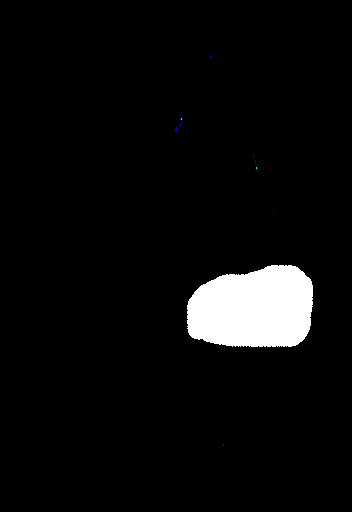

In [10]:
mask = cv2.imread("/content/Self-Correction-Human-Parsing/inputs/mask.png")
cv2_imshow(mask)

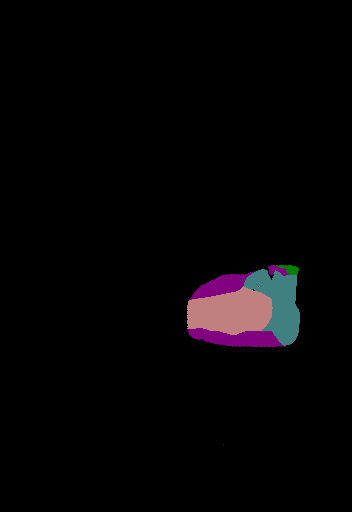

In [11]:
# Overlay the mask on the parsing image
overlay = cv2.bitwise_and(parsing_image, parsing_image, mask=mask[:,:,2])
cv2_imshow(overlay)


In [12]:
for class_index in range(dataset.shape[-1]):

    class_data  = dataset[:, :, class_index]

    threshold = 6
    # Create a mask based on the threshold
    class_data_mask = class_data >= threshold

    class_data_pixels = parsing_image.copy()
    class_data_pixels[~class_data_mask] = 0
    # cv2_imshow(class_data_pixels)


    overlap = cv2.bitwise_and(class_data_pixels, class_data_pixels, mask=mask[:,:,2])
    # cv2_imshow(overlap)
    if np.any(overlap):
      print(class_index)

2
5
9
14
15
